# Summary Statistics History

This notebook showcases the use of the `inventor_summary_trend_plot()` function to easily plot the history of key summary statistics (matching rate, homonymy rate, and name variation rate) for PatentsView.org.

## Step 1: Download Required Files

The first step is to download required files, namely "g_persistent_inventor.tsv" and "g_inventor_not_disambiguated.tsv" from PatentsView's bulk data downloads. The first file contains the disambiguation history. The second file is used to obtain inventor names.

In [1]:
import pandas as pd
import wget
import zipfile
import os
from urllib.parse import urlparse

import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white" # Set plotly theme

def download_unzip(url, overwrite=False):
    basename = os.path.basename(urlparse(url).path)
    filename = basename.rstrip(".zip")
    if not os.path.isfile(filename) or overwrite:
        wget.download(url)
        with zipfile.ZipFile(basename, 'r') as zip_ref:
            zip_ref.extractall(".")
        os.remove(basename)
    return filename

persistent_inventor_file = download_unzip("https://s3.amazonaws.com/data.patentsview.org/download/g_persistent_inventor.tsv.zip")
inventor_not_disambiguated_file = download_unzip("https://s3.amazonaws.com/data.patentsview.org/download/g_inventor_not_disambiguated.tsv.zip")

In [2]:
persistent_inventor = pd.read_csv(persistent_inventor_file, sep="\t", dtype=str)
inventor_not_disambiguated = pd.read_csv(inventor_not_disambiguated_file, sep="\t", dtype=str)

## Step 2: Compute Inventor Mention Names

We now recover names associated with each inventor mention.

In [3]:
inventor_not_disambiguated["mention_id"] = "US" + inventor_not_disambiguated.patent_id + "-" + inventor_not_disambiguated.inventor_sequence
inventor_not_disambiguated["name"] = inventor_not_disambiguated.raw_inventor_name_first + " " + inventor_not_disambiguated.raw_inventor_name_last
inventor_not_disambiguated.set_index("mention_id", inplace=True)
names = inventor_not_disambiguated["name"]

## Step 3: Plot Summary Statistics History

The `persistent_inventor` and `names` DataFrame can now be passed to `inventor_summary_trend_plot()` to obtain the summary statistics history.

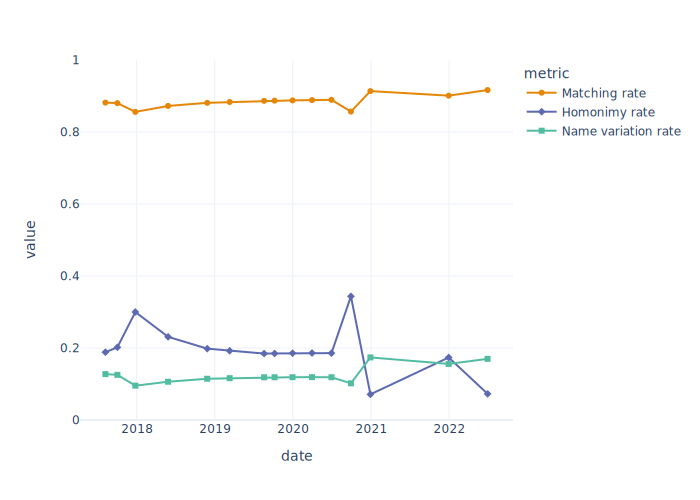

In [4]:
from pv_evaluation.benchmark import inventor_summary_trend_plot

fig = inventor_summary_trend_plot(persistent_inventor, names)
fig.show(renderer="svg")

The plot is tweaked below.

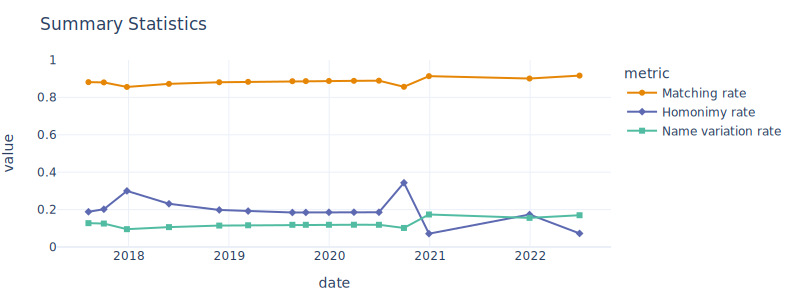

In [5]:
fig.update_layout(
    width=800,
    height=300,
    title="Summary Statistics"
)
fig['layout'].update(margin=dict(l=20,r=20,b=20,t=60))

fig.write_image("summary_trend.pdf")
fig.show(renderer="svg")